Questo notebook analizza e confronta i risultati delle due implementazioni in MATLAB della decompsizione di Cholesky

La prima fa uso del metodo *chol()*, restituendo la decomposizione, su cui va poi calcolato il sistema lineare, attraverso permutazione delle righe della matrice

La seconda utilizza direttamente la funzione backslash (\\) di MATLAB, che fa uso dietro le quinte della decomposizione di CHolesky se si rende conto che la matrice in input è SDP

Il confronto è stato fatto confrontando le due implementazioni (chol vs \\) su entrambi gli OS 

Non aveva senso confrontare la stessa implementazione (chol vs chol) e (\\ vs \\) sui due diversi OS, in quanto i risulati erano molto simili tra loro, e l'analisi dettagliata per il confronto tra i sistemi operativi è stata già vista nelle analisi MATLAB vs Python

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from helper import *

import os
from costants import ERROR, NAME, MEMORY, TIME
from Analysis.resources.costants import RESOURCES_DIRECTORY

import sklearn
from sklearn.cluster import KMeans

In [4]:
folder_name = "backslash_comparison"

LEGEND_1 = "Chol Method"
LEGEND_2 = "Backslash Method"

# Data Loading

data = pd.read_csv(os.path.join(RESOURCES_DIRECTORY,"data.csv"))
data_chol = data[(data.Language == 0)]      # just MATLAB data
data_chol_win, data_chol_lin = get_data_sorted_by_os("Rows", data_chol)

data_backslash = pd.read_csv(os.path.join(RESOURCES_DIRECTORY,"dataBackslash.csv"))
data_backslash_win, data_backslash_lin = get_data_sorted_by_os("Rows", data_backslash)

matrix_names = data_chol_win.Name.tolist()

In [9]:
print(data_backslash_win.sort_values(by="Name").to_latex(index=False, escape=True))

\begin{tabular}{lrrrrrrr}
\toprule
          Name &    Rows &     Nnz &        Error &    Memory &     Time &  Language &  OS \\
\midrule
    G3\_circuit & 1585478 & 7660826 & 3.576900e-12 & 133.42310 & 8.253900 &         0 &   0 \\
       apache2 &  715176 & 4817870 & 4.388800e-11 &  23.16700 & 5.512300 &         0 &   0 \\
          cfd1 &   70656 & 1825580 & 1.042100e-13 &   2.84670 & 0.890600 &         0 &   0 \\
          cfd2 &  123440 & 3085406 & 3.687300e-13 &   4.41960 & 2.025700 &         0 &   0 \\
          ex15 &    6867 &   98671 & 6.450600e-07 &   0.65536 & 0.012636 &         0 &   0 \\
 parabolic\_fem &  525825 & 3674625 & 1.049900e-12 &  13.37750 & 1.626700 &         0 &   0 \\
shallow\_water1 &   81920 &  327680 & 2.377800e-16 &   1.05270 & 0.158500 &         0 &   0 \\
\bottomrule
\end{tabular}



C:\Users\simon\AppData\Local\Temp\ipykernel_9636\809714080.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(data_backslash_win.sort_values(by="Name").to_latex(index=False, escape=True))


In [10]:
print(data_backslash_lin.sort_values(by="Name").to_latex(index=False, escape=True))

\begin{tabular}{lrrrrrrr}
\toprule
          Name &    Rows &     Nnz &        Error &  Memory &     Time &  Language &  OS \\
\midrule
    G3\_circuit & 1585478 & 7660826 & 3.576900e-12 & 289.980 & 8.799500 &         0 &   1 \\
       apache2 &  715176 & 4817870 & 4.388800e-11 &   0.000 & 5.913800 &         0 &   1 \\
          cfd1 &   70656 & 1825580 & 1.042100e-13 &  29.064 & 0.947520 &         0 &   1 \\
          cfd2 &  123440 & 3085406 & 3.687300e-13 &  19.140 & 2.200200 &         0 &   1 \\
          ex15 &    6867 &   98671 & 6.450600e-07 &   0.000 & 0.013287 &         0 &   1 \\
 parabolic\_fem &  525825 & 3674625 & 1.049900e-12 & -48.212 & 1.766000 &         0 &   1 \\
shallow\_water1 &   81920 &  327680 & 2.377800e-16 &   0.000 & 0.155340 &         0 &   1 \\
\bottomrule
\end{tabular}



C:\Users\simon\AppData\Local\Temp\ipykernel_9636\2408801206.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(data_backslash_lin.sort_values(by="Name").to_latex(index=False, escape=True))


# Error

Valori di errore praticamente uguali, differenze minime ed impercettibili (per entrambi gli OS)

## Windows

List of errors:
 [6.3482e-07, 1.1359e-13, 2.6728e-16, 3.3486e-13, 1.05e-12, 4.3889e-11, 3.5766e-12] 
 [6.4506e-07, 1.0421e-13, 2.3778e-16, 3.6873e-13, 1.0499e-12, 4.3888e-11, 3.5769e-12]
Difference:
 [-1.024000000000007e-08, 9.379999999999994e-15, 2.9499999999999986e-17, -3.3869999999999986e-14, 9.999999999996928e-17, 1.0000000000021162e-15, -2.9999999999990784e-16] 
Average:  -1.4628605229285814e-09
Division:
 [0.9841255077047095, 1.0900105556088666, 1.124064261081672, 0.908144170531283, 1.0000952471663969, 1.0000227852716004, 0.9999161284911516]


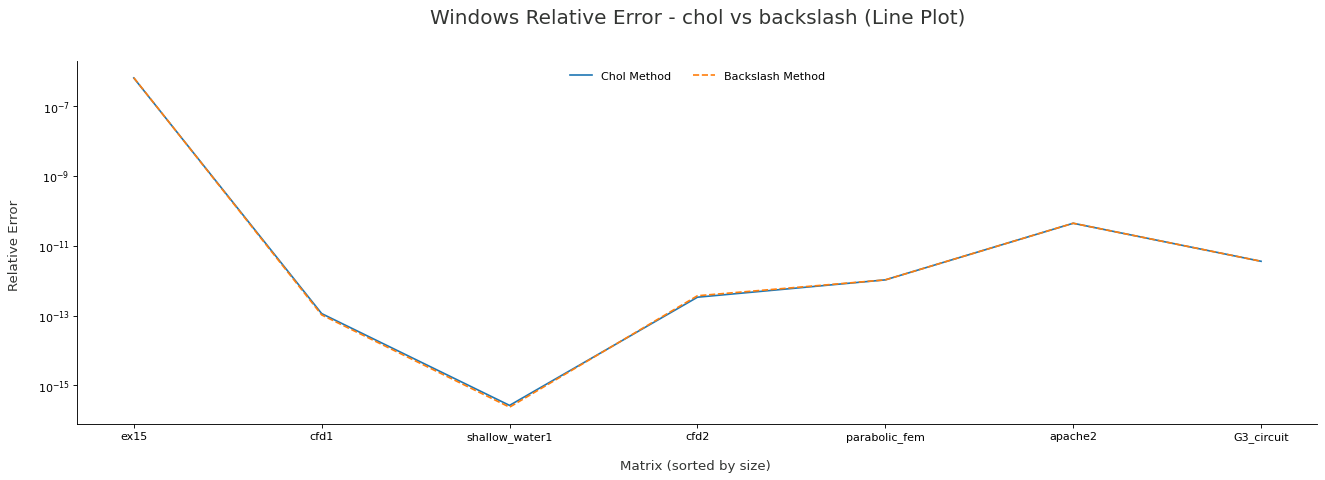

In [22]:
path = get_figures_path(folder_name, "error_windows_line.png")

print("List of errors:\n", data_chol_win["Error"].to_list(), "\n", data_backslash_win["Error"].to_list())

difference = list(np.array(data_chol_win["Error"].to_list()) - np.array(data_backslash_win["Error"].to_list()))
division = list(np.array(data_chol_win["Error"].to_list()) / np.array(data_backslash_win["Error"].to_list()))
print("Difference:\n", difference, "\nAverage: ", sum(difference)/len(difference))
print("Division:\n", division)

plot(matrix_names, data_chol_win["Error"], data_backslash_win["Error"], NAME, ERROR, "Windows Relative Error - chol vs backslash", LEGEND_1, LEGEND_2, path, LOG_SCALE=True)

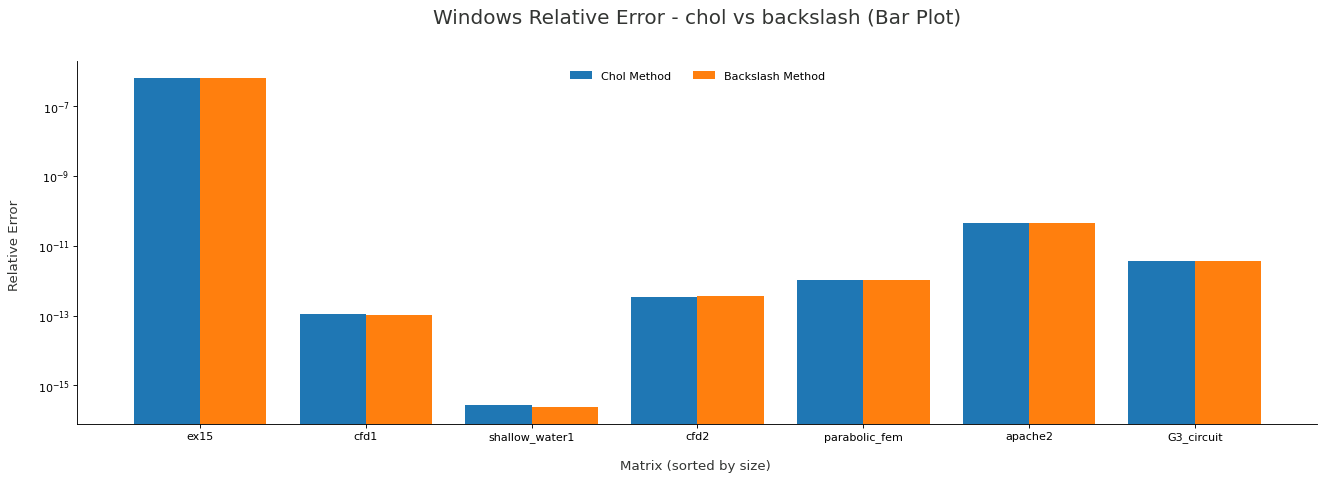

In [4]:
path = get_figures_path(folder_name, "error_windows_bar.png")

bar_plot(matrix_names, data_chol_win["Error"], data_backslash_win["Error"], NAME, ERROR, "Windows Relative Error - chol vs backslash", LEGEND_1, LEGEND_2, path, LOG_SCALE=True)

## Linux

List of errors:
 [6.3482e-07, 1.1359e-13, 2.6728e-16, 3.3486e-13, 1.05e-12, 4.3889e-11, 3.5766e-12] 
 [6.4506e-07, 1.0421e-13, 2.3778e-16, 3.6873e-13, 1.0499e-12, 4.3888e-11, 3.5769e-12]
Difference:
 [-1.024000000000007e-08, 9.379999999999994e-15, 2.9499999999999986e-17, -3.3869999999999986e-14, 9.999999999996928e-17, 1.0000000000021162e-15, -2.9999999999990784e-16] 
Average:  -1.4628605229285814e-09
Division:
 [0.9841255077047095, 1.0900105556088666, 1.124064261081672, 0.908144170531283, 1.0000952471663969, 1.0000227852716004, 0.9999161284911516]


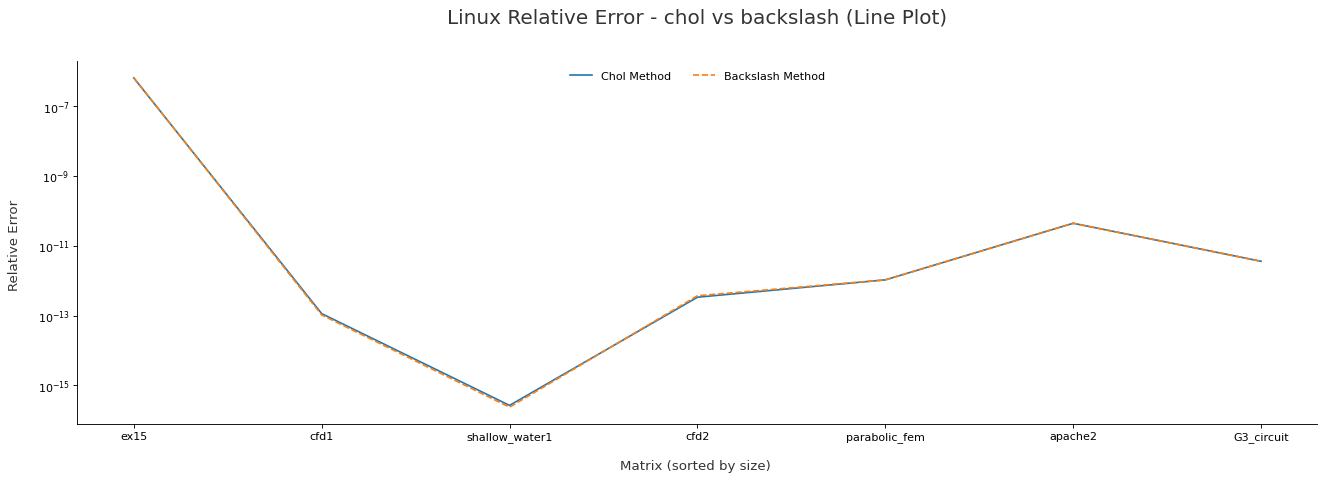

In [21]:
path = get_figures_path(folder_name, "error_linux_line.png")

print("List of errors:\n", data_chol_lin["Error"].to_list(), "\n", data_backslash_lin["Error"].to_list())

difference = list(np.array(data_chol_lin["Error"].to_list()) - np.array(data_backslash_lin["Error"].to_list()))
division = list(np.array(data_chol_lin["Error"].to_list()) / np.array(data_backslash_lin["Error"].to_list()))
print("Difference:\n", difference, "\nAverage: ", sum(difference)/len(difference))
print("Division:\n", division)

plot(matrix_names, data_chol_lin["Error"], data_backslash_lin["Error"], NAME, ERROR, "Linux Relative Error - chol vs backslash", LEGEND_1, LEGEND_2, path, LOG_SCALE=True)

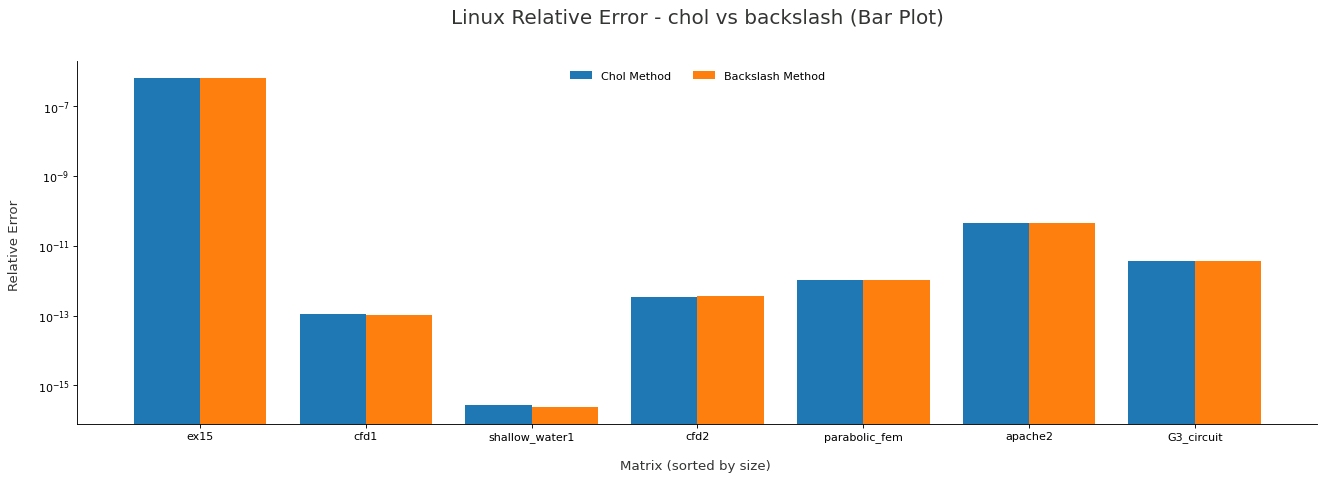

In [6]:
path = get_figures_path(folder_name, "error_linux_bar.png")

bar_plot(matrix_names, data_chol_lin["Error"], data_backslash_lin["Error"], NAME, ERROR, "Linux Relative Error - chol vs backslash", LEGEND_1, LEGEND_2, path, LOG_SCALE=True)

# Memory

Backslah funziona nettamente meglio, il che è dovuto al fatto che probabilmente effettua delle operazioni particolari sulla matrice di decomposizione che ottimizzano l'utilizzo della memoria

## Windows

List of memory usage:
 [3.6168, 577.5852, 41.5662, 1187.7089, 607.6006, 2877.0181, 3262.5295] 
 [0.65536, 2.8467, 1.0527, 4.4196, 13.3775, 23.167, 133.4231]
Difference:
 [2.96144, 574.7384999999999, 40.5135, 1183.2893000000001, 594.2230999999999, 2853.8511, 3129.1064] 
Average:  1196.954762857143


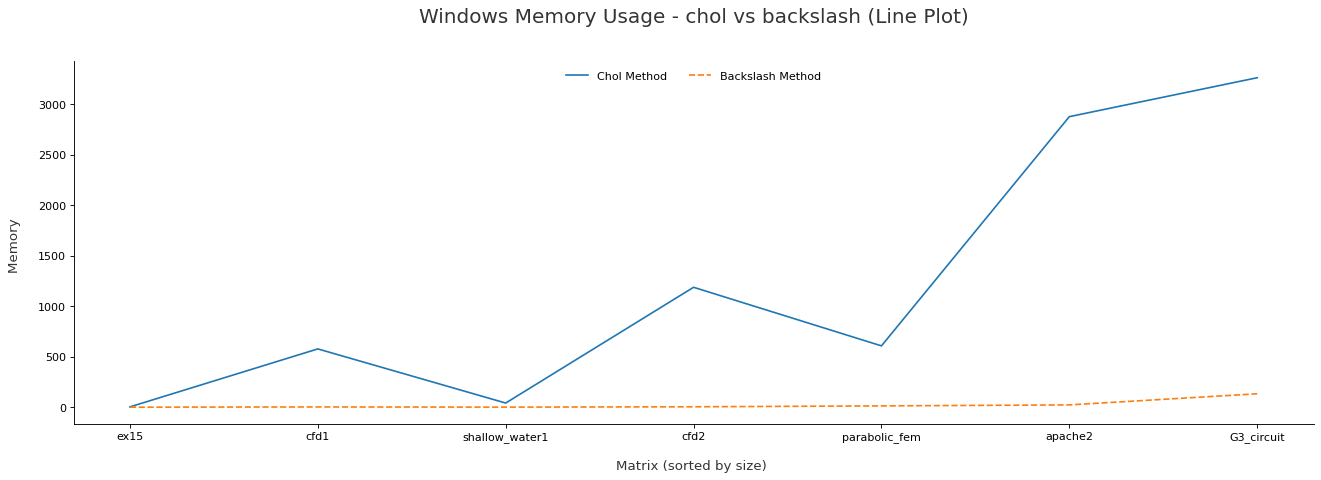

In [23]:
path = get_figures_path(folder_name, "memory_windows_line.png")

print("List of memory usage:\n", data_chol_win["Memory"].to_list(), "\n", data_backslash_win["Memory"].to_list())

difference = list(np.array(data_chol_win["Memory"].to_list()) - np.array(data_backslash_win["Memory"].to_list()))
print("Difference:\n", difference, "\nAverage: ", sum(difference)/len(difference))

plot(matrix_names, data_chol_win["Memory"], data_backslash_win["Memory"], NAME, MEMORY, "Windows Memory Usage - chol vs backslash", LEGEND_1, LEGEND_2, path)

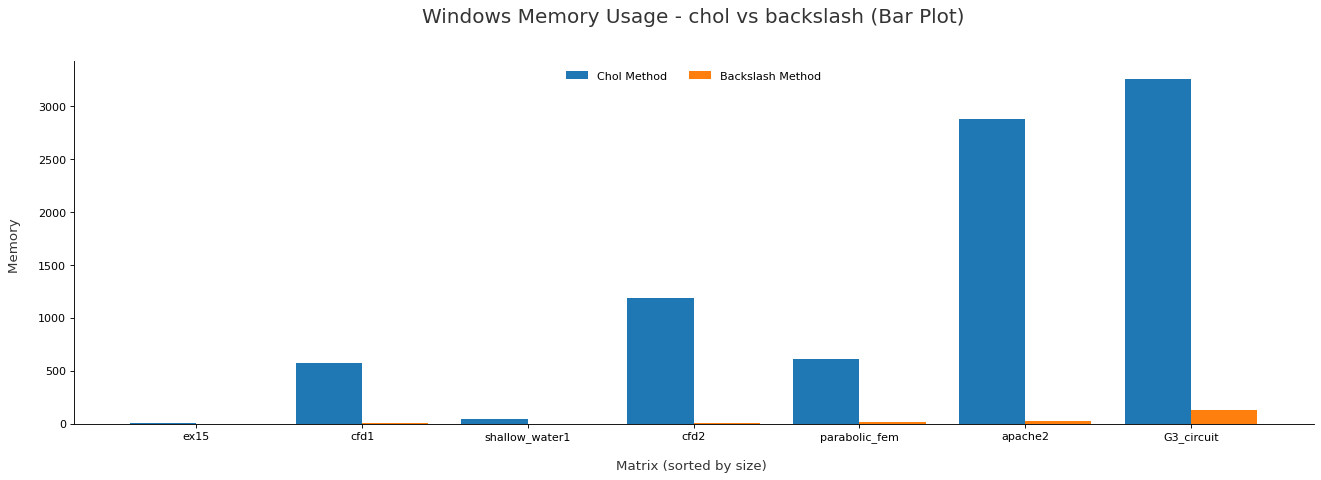

In [8]:
path = get_figures_path(folder_name, "memory_windows_bar.png")

bar_plot(matrix_names, data_chol_win["Memory"], data_backslash_win["Memory"], NAME, MEMORY, "Windows Memory Usage - chol vs backslash", LEGEND_1, LEGEND_2, path)

## Linux

List of memory usage:
 [0.0, 560.592, 0.0, 1145.468, 538.452, 2769.992, 3203.66] 
 [0.0, 29.064, 0.0, 19.14, -48.212, 0.0, 289.98]
Difference:
 [0.0, 531.528, 0.0, 1126.328, 586.664, 2769.992, 2913.68] 
Average:  1132.5988571428572


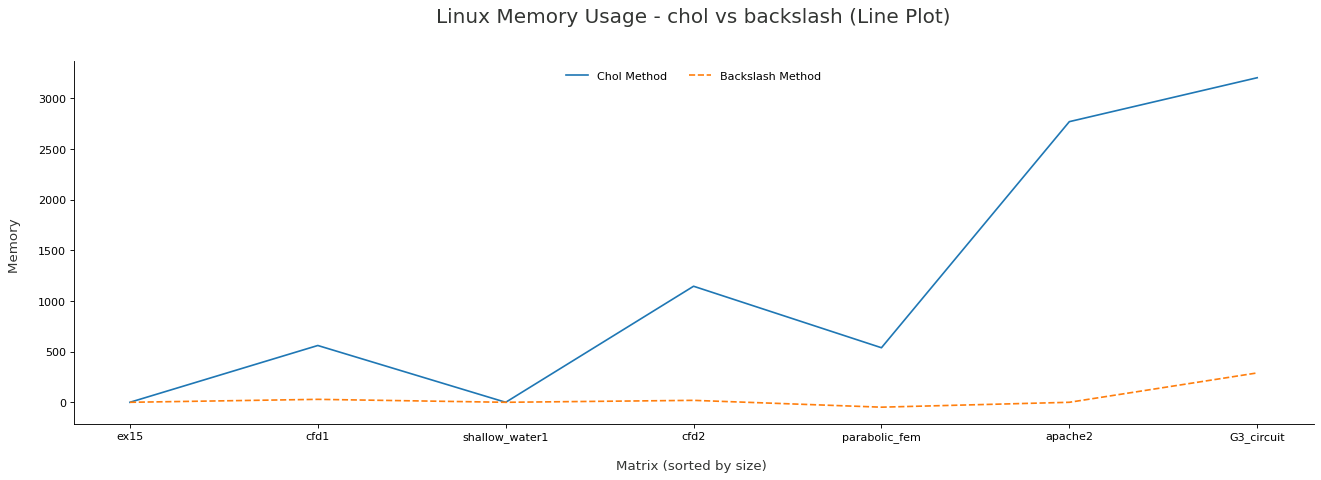

In [24]:
path = get_figures_path(folder_name, "memory_linux_line.png")

print("List of memory usage:\n", data_chol_lin["Memory"].to_list(), "\n", data_backslash_lin["Memory"].to_list())

difference = list(np.array(data_chol_lin["Memory"].to_list()) - np.array(data_backslash_lin["Memory"].to_list()))
print("Difference:\n", difference, "\nAverage: ", sum(difference)/len(difference))

plot(matrix_names, data_chol_lin["Memory"], data_backslash_lin["Memory"], NAME, MEMORY, "Linux Memory Usage - chol vs backslash" , LEGEND_1, LEGEND_2, path)

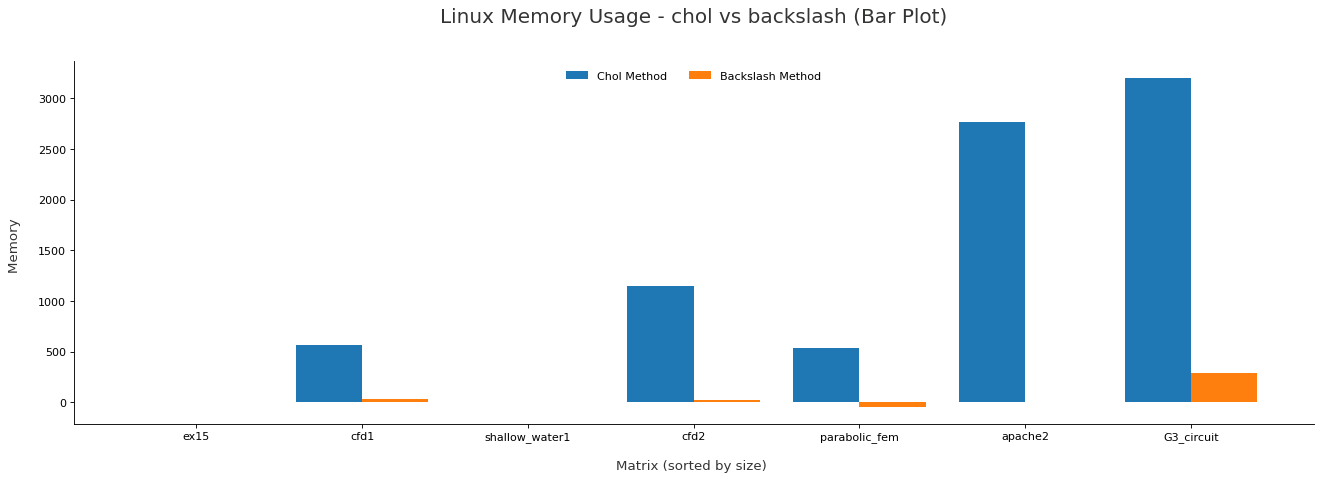

In [10]:
path = get_figures_path(folder_name, "memory_linux_bar.png")

bar_plot(matrix_names, data_chol_lin["Memory"], data_backslash_lin["Memory"], NAME, MEMORY, "Linux Memory Usage - chol vs backslash" , LEGEND_1, LEGEND_2, path)

# Time


Backslah funziona nettamente meglio, il che è dovuto al fatto che probabilmente effettua delle operazioni particolari sulla matrice di decomposizione che ottimizzano il tempo di esecuzione

## Windows

List of time elapsed:
 [0.030822, 2.5576, 0.25437, 6.0834, 3.0333, 13.4307, 19.5037] 
 [0.012636, 0.8906, 0.1585, 2.0257, 1.6267, 5.5123, 8.2539]
Difference:
 [0.018186, 1.6669999999999998, 0.09586999999999998, 4.0577000000000005, 1.4066, 7.9184, 11.249799999999999] 
Average:  3.7733651428571426


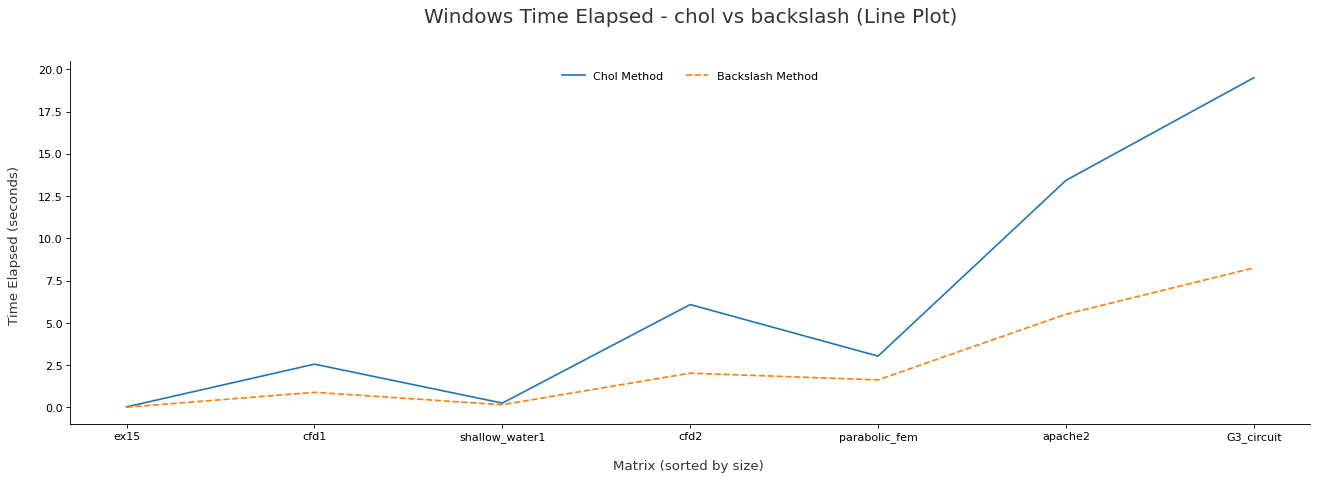

In [26]:
path = get_figures_path(folder_name, "time_windows_line.png")

print("List of time elapsed:\n", data_chol_win["Time"].to_list(), "\n", data_backslash_win["Time"].to_list())

difference = list(np.array(data_chol_win["Time"].to_list()) - np.array(data_backslash_win["Time"].to_list()))
print("Difference:\n", difference, "\nAverage: ", sum(difference)/len(difference))

plot(matrix_names, data_chol_win["Time"], data_backslash_win["Time"], NAME, TIME, "Windows Time Elapsed - chol vs backslash", LEGEND_1, LEGEND_2, path)

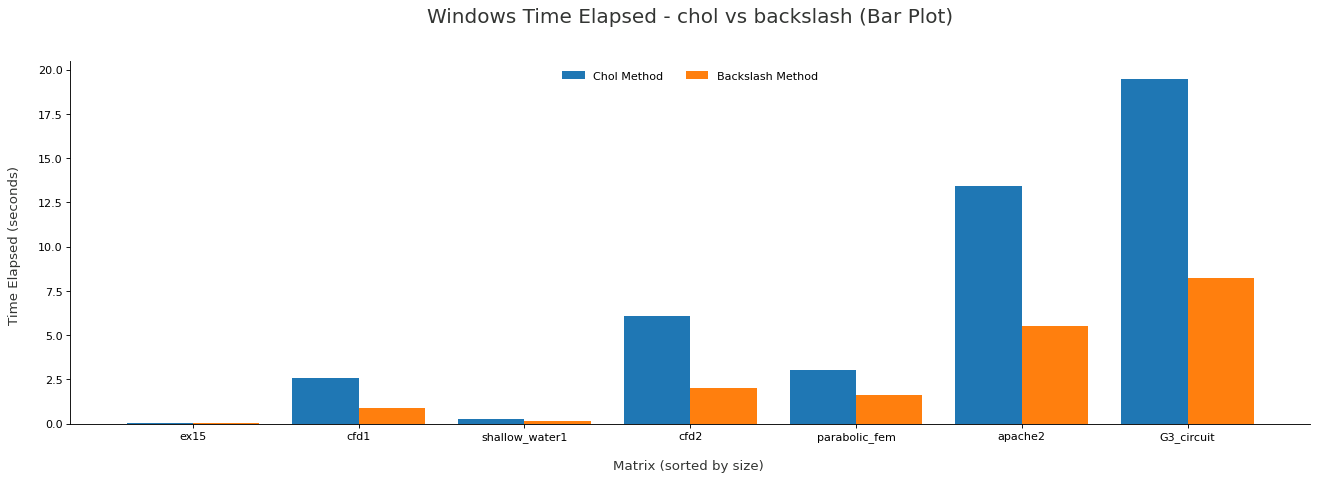

In [12]:
path = get_figures_path(folder_name, "time_windows_bar.png")

bar_plot(matrix_names, data_chol_win["Time"], data_backslash_win["Time"], NAME, TIME, "Windows Time Elapsed - chol vs backslash", LEGEND_1, LEGEND_2, path)

## Linux

List of time elapsed:
 [0.024699, 2.7237, 0.26305, 6.2418, 3.2869, 15.1453, 18.8832] 
 [0.013287, 0.94752, 0.15534, 2.2002, 1.766, 5.9138, 8.7995]
Difference:
 [0.011411999999999999, 1.77618, 0.10771, 4.041599999999999, 1.5209000000000001, 9.2315, 10.083699999999999] 
Average:  3.8247145714285713


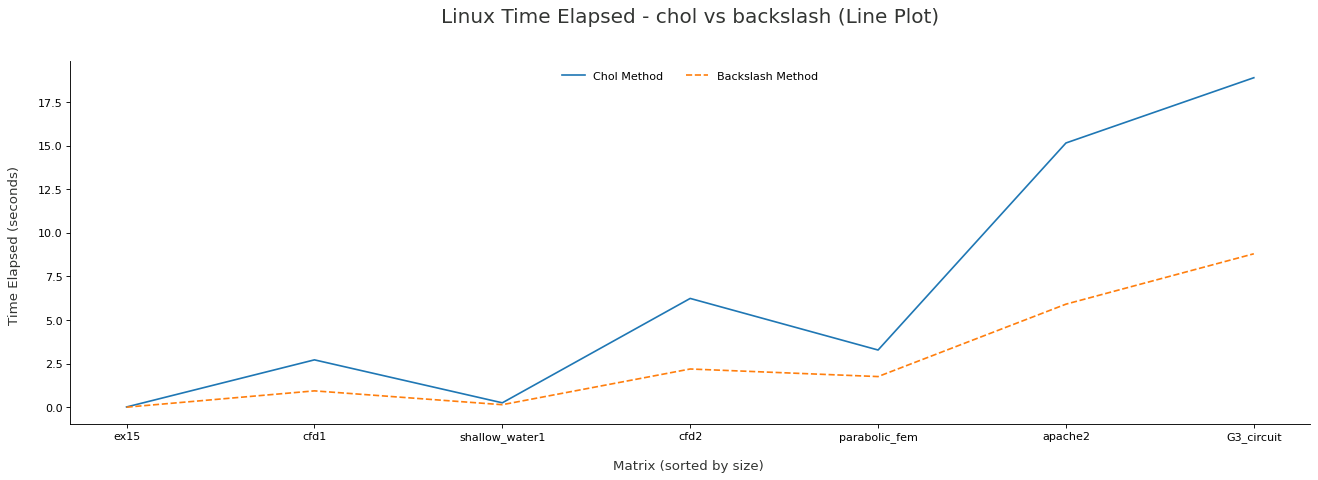

In [25]:
path = get_figures_path(folder_name, "time_linux_line.png")

print("List of time elapsed:\n", data_chol_lin["Time"].to_list(), "\n", data_backslash_lin["Time"].to_list())

difference = list(np.array(data_chol_lin["Time"].to_list()) - np.array(data_backslash_lin["Time"].to_list()))
print("Difference:\n", difference, "\nAverage: ", sum(difference)/len(difference))

plot(matrix_names, data_chol_lin["Time"], data_backslash_lin["Time"], NAME, TIME, "Linux Time Elapsed - chol vs backslash" , LEGEND_1, LEGEND_2, path)

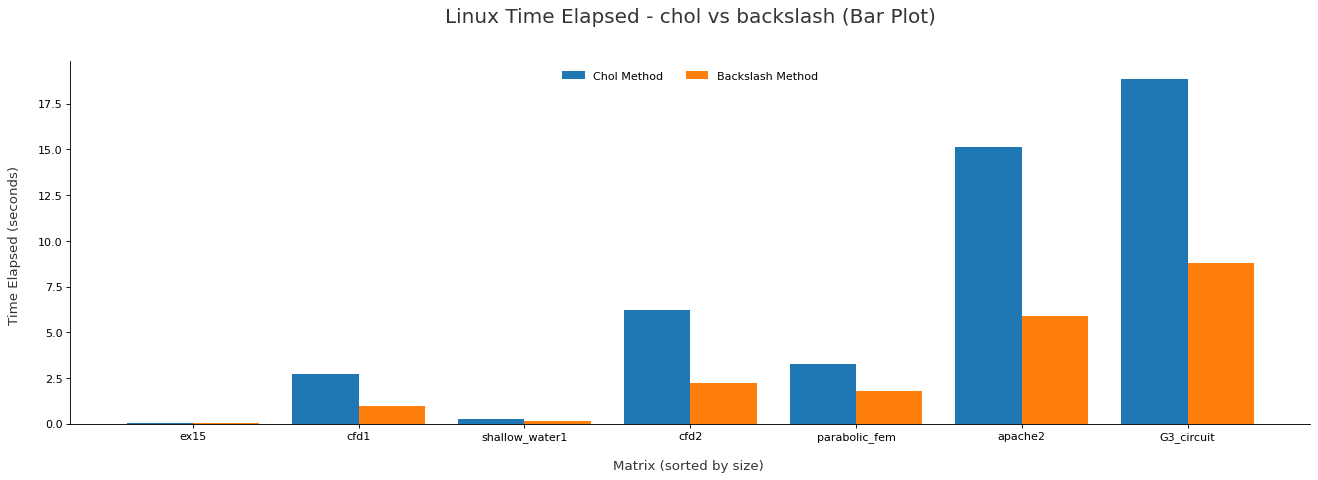

In [14]:
path = get_figures_path(folder_name, "time_linux_bar.png")

bar_plot(matrix_names, data_chol_lin["Time"], data_backslash_lin["Time"], NAME, TIME, "Linux Time Elapsed - chol vs backslash" , LEGEND_1, LEGEND_2, path)